## Introduction
In this third and last part I want to relate my thoughts and conclusions from the analysis as I progress. First I start by loading the libraries with imagerecognition and listing data that created before. See [airbnb01] and [airbnb02]

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Loading Datasets
reviews = pd.read_csv('airbnb_reviews_textblob.csv')
listing = pd.read_csv('airbnb_listing_imagereco.csv')

In [3]:
# Merges reviews and listing matching each review with its corresponding listing.
common = reviews.merge(listing)
# The two lines below removes rows not in common between listing and reviews datasets.
#reviews = reviews[reviews.id.isin(common.id)]
#listing = listing[listing.id.isin(common.id)]

## Data exploration
It is important to have an idea of how the datasets look like, for this I use different methods from pandas. Each process is briefly explained below: 

In [14]:
# Number of rows for each dataset
print(f"Reviews: {len(reviews.index)}")
print(f"Listing: {len(listing.index)}")

Reviews: 1486
Listing: 305


In [5]:
# listing data types for reviews
reviews.dtypes

id                    int64
author               object
rating                int64
comments             object
Polarity            float64
Sentiment            object
Keywords_reviews     object
dtype: object

## Understanding the data
### Reviews:
There are 7 columns in this dataset:

   1. **id:** unique identifier and can be used to match with the listing id.
   2. **author:** name of the person who wrote the id. (For this analysis it is irrelevant)
   3. **rating:** from 1 to 5, it can be good to compare it with the results obtained form the sentiment analysis.
   4. **comments:** long strings of text. Could be used for sentiment analysis, finding the most frequent word used etc. 
   5. **Polarity:** ranges from -1 to 1. Negative values are considered bad, and positive values good. 
   6. **Sentiment:** based on polarity but expressed in words. Negative, Neutral, Positive.
   7. **Keywords_reviews:** this column won't be used in this analysis.

In [7]:
# listing data types for listing
listing.dtypes

id                         int64
city                      object
neighborhood              object
name                      object
lat                      float64
lng                      float64
person_capacity            int64
space_type                object
picture_url               object
price_rate                 int64
image_description         object
image_dominantfgColor     object
image_dominantbgColor     object
dtype: object

### Listing:
This dataset has more variety (13 columns) but is shorter in lenght (304 rows) compared to the reviews. 
    
   1. **id:** Unique id for the listing. 
   2. **city:** This column can be disregarded as we already know all data is from Toronto.
   3. **neighborhood:** Could be useful to obtain grouped by results from it.
   4. **name:** This is the name or description the host gives to its listing. I will search for the most common words used in it. 
   5. **lat:** latitude. Used for mapping.
   6. **lng:** longitude. Used for mapping.
   7. **person_capacity:** Could be good to compare this value with others. e.g vs price, vs space_type, vs location
   8. **space_type:** Could be useful to obtain grouped by results from it.
   9. **picture_url:** This was used in image recognition program. I won't use it for this analysis. 
   10. **price_rate:** This is probably the most important value to analyze from this dataset.
   11. **image_description:** This is a brief description form the picture. Doesn't seem very accurate but I will use it for my dashboard with Tableau. (More on that later.)
   12. **image_dominantfgColor:** Could be useful to obtain grouped by results from it.
   13. **image_dominantbgColor:** Could be useful to obtain grouped by results from it.

In [8]:
# searching for null values
listing.isnull().sum()

id                       0
city                     0
neighborhood             0
name                     0
lat                      0
lng                      0
person_capacity          0
space_type               0
picture_url              0
price_rate               0
image_description        0
image_dominantfgColor    0
image_dominantbgColor    0
dtype: int64

In [13]:
# Counting how many Neighborhoods and Space Types there are
print(f"Neighborhoods: {len(listing.neighborhood.unique())}")
print(f"Space type: {len(listing.space_type.unique())}")

Neighborhoods: 43
Space type: 12


## Analysis by Neighborhoods 
Using Describe is great way to get some quick statistics. For example, here I've noticed that 116 out of 271 of the listings are located in Downtown Toronto, which also has the most expensive place of all at 139\$ per night. Average price is 67\$ with a standard deviation of 20.9.

In [17]:
# Neighborhoods
listing.groupby(by='neighborhood')['price_rate']\
.describe()\
.sort_values(by='count', ascending=False)\
.head(5)

,count,mean,std,min,25%,50%,75%,max
neighborhood,,,,,,,,
Downtown Toronto,116.0,67.129310,20.956074,19.0,53.00,67.0,75.75,139.0
Garden District,21.0,49.761905,16.260088,11.0,41.00,51.0,60.00,75.0
Niagara,17.0,67.235294,10.991641,45.0,60.00,72.0,75.00,85.0
Palmerston/Little Italy,12.0,32.750000,8.955699,24.0,27.50,29.5,35.75,56.0
Harbourfront,12.0,73.000000,23.436568,44.0,57.75,71.5,78.00,130.0


### Graph 1: Neighborhoods vs Price Rate
Now I will plot these top 5 neighborhood to better showcase density and distribution of prices.

{'bodies': [<matplotlib.collections.PolyCollection at 0xf4cba90>,
 'cmaxes': <matplotlib.collections.LineCollection at 0xf4cba50>,
 'cmins': <matplotlib.collections.LineCollection at 0xf4cb670>,
 'cbars': <matplotlib.collections.LineCollection at 0xf4cb690>}

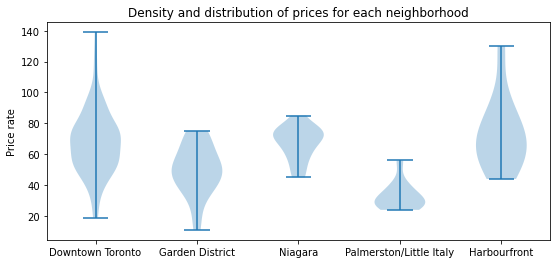

In [18]:
# Filtering data for just the 5 nieghborhoods

nbhood = ['Downtown Toronto', 'Garden District', 'Niagara', 'Palmerston/Little Italy', 'Harbourfront']

nb1 = listing.loc[listing['neighborhood'] == nbhood[0]]
nb2 = listing.loc[listing['neighborhood'] == nbhood[1]] 
nb3 = listing.loc[listing['neighborhood'] == nbhood[2]] 
nb4 = listing.loc[listing['neighborhood'] == nbhood[3]] 
nb5 = listing.loc[listing['neighborhood'] == nbhood[4]] 

data_to_plot = [nb1.price_rate, nb2.price_rate, nb3.price_rate, nb4.price_rate, nb5.price_rate]

# Creates a figure instance
fig1 = plt.figure(figsize=(9, 4))

# Create an axes instance
ax = fig1.subplots()
ax.set_title('Density and distribution of prices for each neighborhood')
ax.set_ylabel('Price rate')
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(nbhood)

# Create the boxplot
ax.violinplot(dataset=data_to_plot)

From this plot I came out with this conclusions:

1. Downtown Toronto has the highest range of prices for the listings, its price density sits above the price average. Though, it was expected for Downtown to be expensive.
2. Niagara seems to have a tendency to have higher prices rather than low. Its average is close to that of DownTown toronto.
3. Price rate distribution and density for Little Italy is low compared to other neighborhoods in our analysis. It is an affordable place to look for in airbnb. 
4. Harbourfront lowest price rate is just below Downtown Toronto's average price rate. It is an expensive borough to live in. 

## Analysis by Space type
Majority of listings are described as condos, apartments and private rooms. It is expected that renting an entire place will be more expensive however it is interesting to notice that the minimum price is only 11$ for the "entire apartment". Most likely is a mistake by the host.

In [19]:
listing.groupby(by='space_type')['price_rate']\
.describe()\
.sort_values(by='count', ascending=False)\
.head(5)

,count,mean,std,min,25%,50%,75%,max
space_type,,,,,,,,
Entire condominium,106.0,69.603774,16.309903,37.0,57.25,68.0,75.00,120.0
Entire apartment,82.0,56.975610,19.089766,11.0,44.00,53.0,70.50,130.0
Private room,46.0,33.304348,12.323184,14.0,25.00,32.0,41.75,66.0
Entire guest suite,16.0,51.687500,14.164363,19.0,43.25,54.0,57.75,75.0
Entire house,10.0,52.100000,22.338059,29.0,39.50,44.0,55.25,104.0


### Graph 2: Space Type vs Price Rate
Plotting the top 5 most common space types found.

{'bodies': [<matplotlib.collections.PolyCollection at 0xf77a750>,
 'cmaxes': <matplotlib.collections.LineCollection at 0xf77a710>,
 'cmins': <matplotlib.collections.LineCollection at 0xf77a3b0>,
 'cbars': <matplotlib.collections.LineCollection at 0xf77a390>}

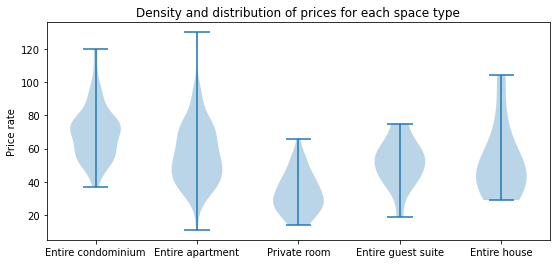

In [20]:
# Filtering data for just the 5 space types

stype = ['Entire condominium', 'Entire apartment', 'Private room', 'Entire guest suite', 'Entire house']

st1 = listing.loc[listing['space_type'] == stype[0]]
st2 = listing.loc[listing['space_type'] == stype[1]] 
st3 = listing.loc[listing['space_type'] == stype[2]] 
st4 = listing.loc[listing['space_type'] == stype[3]] 
st5 = listing.loc[listing['space_type'] == stype[4]] 

data_to_plot = [st1.price_rate, st2.price_rate, st3.price_rate, st4.price_rate, st5.price_rate]

# Creates a figure instance
fig1 = plt.figure(figsize=(9, 4))

# Create an axes instance
ax = fig1.subplots()
ax.set_title('Density and distribution of prices for each space type')
ax.set_ylabel('Price rate')
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(stype)

# Create the boxplot
ax.violinplot(dataset=data_to_plot)

A few conclusions on density and distribution of prices for each space type:

 1. Entire condos and apartments have a wide range of prices, however their density is on average higher than any other space type. Condos are more expensive than apartments. 
 2. Private rooms density is higher on its lowest range of prices.
 3. It is interesting o see listings labeled as Entire house have a considerably lower cost compared to other entire spaces.

## Toronto - Airbnb price rate heatmap

Now, I will create a scatter plot to have an idea of the location in the map where prices are higher. As expected most of the places in this database are clustered 

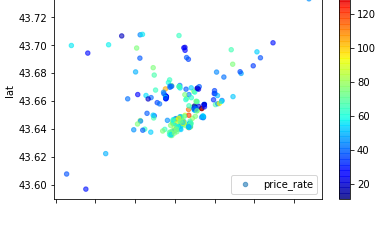

In [94]:
listing.plot(kind='scatter', x='lng', y='lat', label='price_rate',
c=listing['price_rate'], colorbar=True, cmap=plt.get_cmap('jet'), alpha=0.6
)
plt.legend()
plt.show()

## Listing name or title
Here I want to find which are the most common words used in titles by the hosts. First I will remove the stopwords, that way we can focus on the most relevant words. 
### Graph 3: Word frequency in title.
Downtown (74) is the winner by far followed by condo (48), cn (36) (as in CN tower) and room (31). So apparently hosts know that many travelers will look to be close to downtown or have a nice view of the CN tower from their place. Also, condo sounds more fancy than apartment. 

### What adjectives are the most common ?
Cozy is the favorite among hosts tightly followed by private, modern and luxury. 



<AxesSubplot:xlabel='Words'>

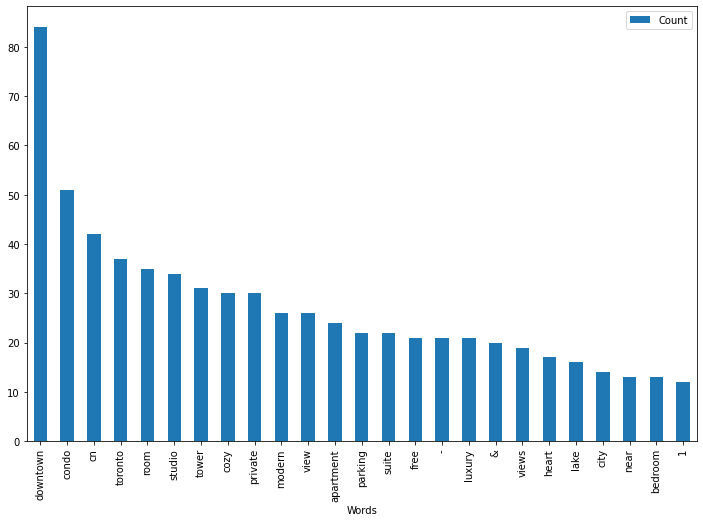

In [10]:
from collections import Counter
from nltk.corpus import stopwords
en_stops = set(stopwords.words('english'))

cnt = Counter()
list_names = []
for l in listing.name.values:
    list_names.append(l)

for i in list_names:
    words = i.lower().split()
    for w in words:
        if w not in en_stops:
            cnt[w] += 1
top_25w = cnt.most_common()
top_25w = top_25w[0:25]
# Create DataFrame
listing_names_df = pd.DataFrame(top_25w)
listing_names_df.rename(columns={0: 'Words', 1:'Count'}, inplace=True)
# Plot 
listing_names_df.plot(kind='bar', x='Words', y='Count', figsize=(12,8))


## Reviews
That was interesting, now I will do the same with the reviews from guests to find what are the most common words used by them.

<AxesSubplot:xlabel='Words'>

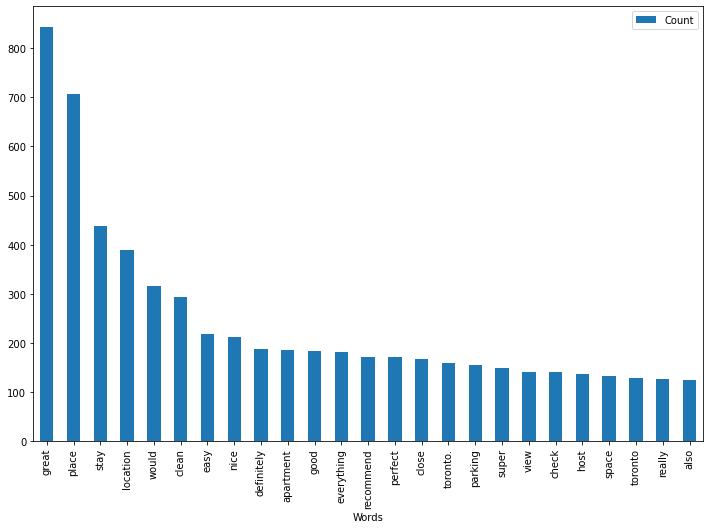

In [11]:
comments_cnt = Counter()
list_comments = []
for l in reviews.comments.values:
    list_comments.append(l)

for i in list_comments:
    words = i.lower().split()
    for w in words:
        if w not in en_stops:
            comments_cnt[w] += 1 
top_25c = comments_cnt.most_common()
top_25c = top_25c[0:25]
# Create DataFrame
comments_df = pd.DataFrame(top_25c)
comments_df.rename(columns={0: 'Words', 1:'Count'}, inplace=True)
# Plot 
comments_df.plot(kind='bar', x='Words', y='Count', figsize=(12,8))

### Most common words used in airbnb reviews
Great! that is the most common word found in our dataset. Other adjectives are, clean, easy, nice, good, and perfect in that order. So apparently people do not tend to use bad adjectives very often as there is none in our top 25 words.

## Airbnb, main picture colors
It has been said that colors can have an effect on people's emotions. Is this something a host should keep in mind while selecting their main picture for their listing ? I want to explore in different ways what can I find with the dominant color columns in our dataset. 

Here is a color-emotion chart that I will use to interpretate colors:

    Color   Express
    -----   --------
    Black   Sophistication, Power, Formality
    Grey    Stability, Security, Maturity
    White   Freshness, Hope, Goodness
    Yellow  Joym cheerfulness, friendliness
    Red     Danger, Passion
    Blue    Peace, Stability
    Green   Life, Growth
    Brown   Natural, Authentic, Tradition
    

### Most common colors in pictures.
Below we can see that the most commonly used dominant colors are White, Grey, and Black; in the same order for both background and foreground. This colors are more neutral which sounds like a reasonable choice to attract more people to their place. 

In [8]:
# Count of background colors
listing.image_dominantbgColor.value_counts()

White     136
Grey       97
Black      29
Brown      23
Blue       15
Green       3
Yellow      2
Name: image_dominantbgColor, dtype: int64

In [7]:
# Count of foreground colors
listing.image_dominantfgColor.value_counts()

White     142
Grey       96
Black      41
Brown      18
Orange      3
Yellow      2
Red         1
Green       1
Blue        1
Name: image_dominantfgColor, dtype: int64

### Most common combination of colors. Foreground and Background. 
White with White is the winner by almost double the size than the second place!. This color can help lighthen the rooms, express freshness and goodness, that according to color-psycholoy charts. People might be choosing this colors for their houses because of this feelings it evokes. 

In [6]:
# Grouping by fgcolor and bgcolor and counting number of unique groups.
listing.groupby(['image_dominantbgColor','image_dominantfgColor']).size().reset_index().rename(columns={0:'count'}).sort_values(by='count', ascending=False).head(10)

,image_dominantbgColor,image_dominantfgColor,count
25,White,White,97
18,Grey,Grey,55
19,Grey,White,32
23,White,Grey,24
0,Black,Black,19
6,Blue,Grey,10
9,Brown,Brown,8
21,White,Black,8
12,Brown,White,7
15,Grey,Black,6


### Price Rate vs Colors
Here I just want to have a better view of the data and how colors can relate to the price hosts have set to their listings. Color does not seem to be affecting the price in any way.

Text(0.5, 1.0, 'Price Rate vs Foreground Color')

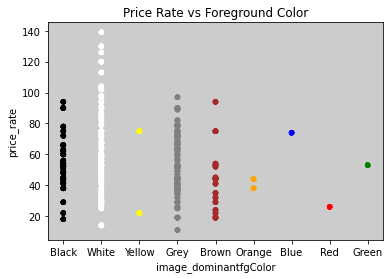

In [9]:
scatter_fgcolor_price = join_df.reset_index().plot(kind='scatter', x='image_dominantfgColor', y='price_rate', c='image_dominantfgColor')
scatter_fgcolor_price.set_facecolor('0.80')
scatter_fgcolor_price.set_title('Price Rate vs Foreground Color')

Text(0.5, 1.0, 'Price Rate vs Background Color')

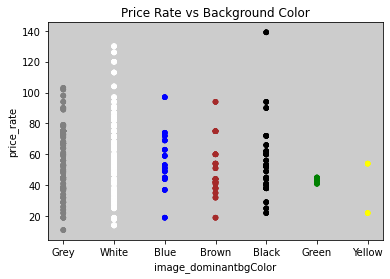

In [8]:
scatter_bgcolor_price = join_df.reset_index().plot(kind='scatter', x='image_dominantbgColor', y='price_rate', c='image_dominantbgColor')
scatter_bgcolor_price.set_facecolor('0.80')
scatter_bgcolor_price.set_title('Price Rate vs Background Color')

## Sentiment Analysis Data
First I'm counting the total count for polarity values in the dataset. Majority of these values are rated as negative however I think this approach of categorizing it is not the best if we want to compare the results of polarity of the reviews with the actual rating by the people, for this reason I wil continue using Polarity instead.

In [32]:
# Counting Sentiment values
reviews.Sentiment.value_counts()

Negative    824
Positve     499
Neutral      25
Name: Sentiment, dtype: int64

In [137]:
# Counting Rating values
reviews.rating.value_counts()

5    1073
4     195
3      58
2      11
1      11
Name: rating, dtype: int64

## Rating and Polarity
As shown in the scatter plot below, polarity is fairly accurate to what the actual rating is. Notice the two outliers for rating 5 and 2.

Text(0.5, 1.0, 'Rating and Polarity')

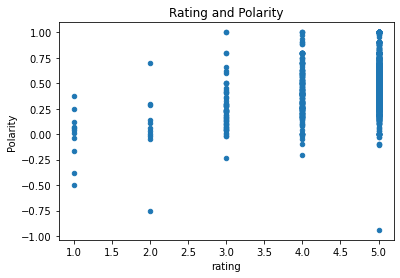

In [15]:
scatter_pol_rating = common.reset_index().plot(kind='scatter', x='rating', y='Polarity')
scatter_pol_rating.set_title('Rating and Polarity')

With a violin plot it is easier to identify where is the density higher. In this plot average polarity increases with the rating meaning that overall the results obtained from the sentyment analysis are at least a bit accurate.  

{'bodies': [<matplotlib.collections.PolyCollection at 0x1329f030>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1329f910>,
 'cmins': <matplotlib.collections.LineCollection at 0x131b72f0>,
 'cbars': <matplotlib.collections.LineCollection at 0x132b3350>}

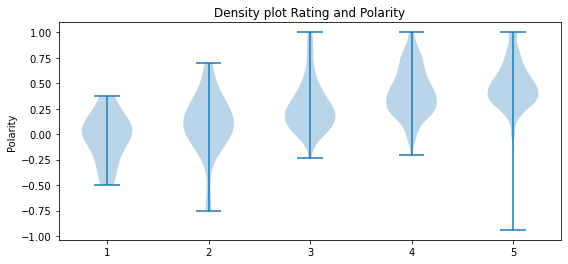

In [28]:
# Filtering data by rate


r1 = reviews.loc[reviews['rating'] == 1]
r2 = reviews.loc[reviews['rating'] == 2] 
r3 = reviews.loc[reviews['rating'] == 3] 
r4 = reviews.loc[reviews['rating'] == 4] 
r5 = reviews.loc[reviews['rating'] == 5] 

data_to_plot = [r1.Polarity, r2.Polarity, r3.Polarity, r4.Polarity, r5.Polarity]

# Creates a figure instance
fig3 = plt.figure(figsize=(9, 4))

# Create an axes instance
ax = fig3.subplots()
ax.set_title('Density plot Rating and Polarity')
ax.set_ylabel('Polarity')
ax.set_xticks([1, 2, 3, 4, 5])

# Create the boxplot
ax.violinplot(dataset=data_to_plot)

On the other hand, if we list the reviews we will quickly notice that many of the reviews have been rated way too low that they should compared with the actual rating from the guests. 

In [35]:
common.loc[common['Polarity'] < 0].sort_values(by='Polarity').head(10)[['author','comments','rating','Polarity']]

,author,comments,rating,Polarity
1252,Harris,"You will not be disappointed, go ahead and book!",5,-0.94
299,Isabela,Expect fucking frying smell at 10 in the eveni...,2,-0.75
649,Juana,"absolutely gross room , there was mold in the ...",1,-0.50
1160,Tarik,The place Iâ€™ve very small and uncomfortable....,1,-0.38
937,Joe,It was no really good experience no internet s...,3,-0.23
483,Cali,"Nice place, insane view!",4,-0.20
544,Kiran,Everything about this location was a bit disap...,1,-0.17
786,Cory,Close to everything downtown. If you arrive l...,5,-0.11
908,Jennifer,Overall a nice place to stay. The TV never wor...,4,-0.10
666,Catherine,Room was exactly as expected.,5,-0.10
